In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import time
from subprocess import check_output
df=pd.read_csv('ALL_98samples.csv')
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,CDR3_AA_ACIDIC,CDR3_AA_ALIPHATIC,CDR3_AA_AROMATIC,CDR3_AA_BASIC,CDR3_AA_BULK,CDR3_AA_CHARGE,CDR3_AA_GRAVY,CDR3_AA_LENGTH,CDR3_AA_POLARITY,...,SEX,STOP,SUBJECT,V_CALL,V_GERM_LENGTH_IMGT,V_GERM_LENGTH_VDJ,V_GERM_START_IMGT,V_GERM_START_VDJ,V_SEQ_LENGTH,V_SEQ_START
0,0,0.105263,0.410526,0.315789,0.052632,15.510000,-1.003173,-0.368421,19.0,8.021053,...,NaN,False,resultsBC_10_genotyped_db-pass-props.tab,IGHV4-34*01,319,292,1,1,292,1
1,1,0.071429,0.771429,0.142857,0.071429,13.752143,-0.001683,0.414286,14.0,8.128571,...,NaN,False,resultsBC_10_genotyped_db-pass-props.tab,"IGHV3-21*01,IGHV3-21*01_A85C",317,293,1,1,293,1
2,2,0.100000,0.390000,0.300000,0.050000,14.960000,-1.007156,-0.440000,20.0,8.000000,...,NaN,False,resultsBC_10_genotyped_db-pass-props.tab,IGHV1-69*01,317,293,1,1,293,1
3,3,0.117647,0.058824,0.470588,0.058824,15.103529,-1.007731,-0.900000,17.0,7.917647,...,NaN,False,resultsBC_10_genotyped_db-pass-props.tab,IGHV3-23*01,319,295,1,1,295,1
4,4,0.111111,0.594444,0.277778,0.055556,15.718889,-1.009332,0.011111,18.0,7.722222,...,NaN,False,resultsBC_10_genotyped_db-pass-props.tab,IGHV1-69*01,319,295,1,1,295,1


In [2]:
dfALLs = df

In [3]:
# split for new comportable coulmns
dfALLs['V_GENE'] = dfALLs['V_CALL'].str.split('*',1).str[0]
dfALLs['V_ALLELE']=dfALLs['V_CALL'].str.split(',',1).str[0]
dfALLs['V_FAMILY']=dfALLs['V_CALL'].str.split('-',1).str[0]

dfALLs['D_GENE'] = dfALLs['D_CALL'].str.split('*',1).str[0]
dfALLs['D_ALLELE']=dfALLs['D_CALL'].str.split(',',1).str[0]
dfALLs['D_FAMILY']=dfALLs['D_CALL'].str.split('-',1).str[0]

dfALLs['J_GENE'] = dfALLs['J_CALL'].str.split('*',1).str[0]
dfALLs['J_FAMILY']=dfALLs['J_CALL'].str.split('-',1).str[0]

In [6]:
dfALLs.head()

,Unnamed: 0,CDR3_AA_ACIDIC,CDR3_AA_ALIPHATIC,CDR3_AA_AROMATIC,CDR3_AA_BASIC,CDR3_AA_BULK,CDR3_AA_CHARGE,CDR3_AA_GRAVY,CDR3_AA_LENGTH,CDR3_AA_POLARITY,...,V_SEQ_LENGTH,V_SEQ_START,V_GENE,V_ALLELE,V_FAMILY,D_GENE,D_ALLELE,D_FAMILY,J_GENE,J_FAMILY
0,0,0.105263,0.410526,0.315789,0.052632,15.510000,-1.003173,-0.368421,19.0,8.021053,...,292,1,IGHV4-34,IGHV4-34*01,IGHV4,IGHD1-26,IGHD1-26*01,IGHD1,IGHJ5,IGHJ5*02
1,1,0.071429,0.771429,0.142857,0.071429,13.752143,-0.001683,0.414286,14.0,8.128571,...,293,1,IGHV3-21,IGHV3-21*01,IGHV3,IGHD6-19,IGHD6-19*01,IGHD6,IGHJ4,IGHJ4*02
2,2,0.100000,0.390000,0.300000,0.050000,14.960000,-1.007156,-0.440000,20.0,8.000000,...,293,1,IGHV1-69,IGHV1-69*01,IGHV1,IGHD3-3,IGHD3-3*01,IGHD3,IGHJ6,IGHJ6*03
3,3,0.117647,0.058824,0.470588,0.058824,15.103529,-1.007731,-0.900000,17.0,7.917647,...,295,1,IGHV3-23,IGHV3-23*01,IGHV3,IGHD3-3,IGHD3-3*01,IGHD3,IGHJ5,IGHJ5*02
4,4,0.111111,0.594444,0.277778,0.055556,15.718889,-1.009332,0.011111,18.0,7.722222,...,295,1,IGHV1-69,IGHV1-69*01,IGHV1,IGHD5-18,IGHD5-18*01,IGHD5,IGHJ6,IGHJ6*03


In [7]:
dfALLs.columns

Index(['Unnamed: 0', 'CDR3_AA_ACIDIC', 'CDR3_AA_ALIPHATIC', 'CDR3_AA_AROMATIC',
       'CDR3_AA_BASIC', 'CDR3_AA_BULK', 'CDR3_AA_CHARGE', 'CDR3_AA_GRAVY',
       'CDR3_AA_LENGTH', 'CDR3_AA_POLARITY', 'CLIN', 'CONSCOUNT', 'D_CALL',
       'D_GERM_LENGTH', 'D_GERM_START', 'D_SEQ_LENGTH', 'D_SEQ_START',
       'FUNCTIONAL', 'INDELS', 'IN_FRAME', 'JUNCTION', 'JUNCTION_LENGTH',
       'J_CALL', 'J_GERM_LENGTH', 'J_GERM_START', 'J_SEQ_LENGTH',
       'J_SEQ_START', 'MUTATED_INVARIANT', 'NP1_LENGTH', 'NP2_LENGTH',
       'PRCONS', 'PRIMER', 'SAMPLE', 'SEQORIENT', 'SEQUENCE_ID',
       'SEQUENCE_IMGT', 'SEQUENCE_INPUT', 'SEQUENCE_VDJ', 'SEX', 'STOP',
       'SUBJECT', 'V_CALL', 'V_GERM_LENGTH_IMGT', 'V_GERM_LENGTH_VDJ',
       'V_GERM_START_IMGT', 'V_GERM_START_VDJ', 'V_SEQ_LENGTH', 'V_SEQ_START',
       'V_GENE', 'V_ALLELE', 'V_FAMILY', 'D_GENE', 'D_ALLELE', 'D_FAMILY',
       'J_GENE', 'J_FAMILY'],
      dtype='object')

In [8]:
pd.options.display.max_columns = None 
display(dfALLs)

,Unnamed: 0,CDR3_AA_ACIDIC,CDR3_AA_ALIPHATIC,CDR3_AA_AROMATIC,CDR3_AA_BASIC,CDR3_AA_BULK,CDR3_AA_CHARGE,CDR3_AA_GRAVY,CDR3_AA_LENGTH,CDR3_AA_POLARITY,CLIN,CONSCOUNT,D_CALL,D_GERM_LENGTH,D_GERM_START,D_SEQ_LENGTH,D_SEQ_START,FUNCTIONAL,INDELS,IN_FRAME,JUNCTION,JUNCTION_LENGTH,J_CALL,J_GERM_LENGTH,J_GERM_START,J_SEQ_LENGTH,J_SEQ_START,MUTATED_INVARIANT,NP1_LENGTH,NP2_LENGTH,PRCONS,PRIMER,SAMPLE,SEQORIENT,SEQUENCE_ID,SEQUENCE_IMGT,SEQUENCE_INPUT,SEQUENCE_VDJ,SEX,STOP,SUBJECT,V_CALL,V_GERM_LENGTH_IMGT,V_GERM_LENGTH_VDJ,V_GERM_START_IMGT,V_GERM_START_VDJ,V_SEQ_LENGTH,V_SEQ_START,V_GENE,V_ALLELE,V_FAMILY,D_GENE,D_ALLELE,D_FAMILY,J_GENE,J_FAMILY
0,0,0.105263,0.410526,0.315789,0.052632,15.510000,-1.003173,-0.368421,19.0,8.021053,Healthy,3,IGHD1-26*01,16.0,3.0,16.0,304.0,True,False,True,TGTGCGAGAGTTTGGGAAGCCTATAGTGGGAGCTACTTCCCGGTCA...,63,IGHJ5*02,50,2,50,327,NaN,11,7.0,IGM,IGM,BC_10,RC,CATAGAGGGAAACAATT,CAGGTGCAGCTACAGCAGTGGGGCGCA...GGACTGTTGAAGCCTT...,CAGGTGCAGCTACAGCAGTGGGGCGCAGGACTGTTGAAGCCTTCGG...,CAGGTGCAGCTACAGCAGTGGGGCGCAGGACTGTTGAAGCCTTCGG...,NaN,False,resultsBC_10_genotyped_db-pass-props.tab,IGHV4-34*01,319,292,1,1,292,1,IGHV4-34,IGHV4-34*01,IGHV4,IGHD1-26,IGHD1-26*01,IGHD1,IGHJ5,IGHJ5*02
1,1,0.071429,0.771429,0.142857,0.071429,13.752143,-0.001683,0.414286,14.0,8.128571,Healthy,6,IGHD6-19*01,15.0,2.0,15.0,298.0,True,False,True,TGTGCGAGCCGAGGTATAGCAGTGGCTAGTGCCCCCTTTGACTACTGG,48,IGHJ4*02,44,5,44,321,NaN,4,8.0,IGM,IGM,BC_10,RC,GAAGAAAATTATTACAT,GAGGTGCAGCTGGTGGAGTCTGGGGGA...GGCCTGGTCAAGCCTG...,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCCTGGTCAAGCCTGGGG...,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCCTGGTCAAGCCTGGGG...,NaN,False,resultsBC_10_genotyped_db-pass-props.tab,"IGHV3-21*01,IGHV3-21*01_A85C",317,293,1,1,293,1,IGHV3-21,IGHV3-21*01,IGHV3,IGHD6-19,IGHD6-19*01,IGHD6,IGHJ4,IGHJ4*02
2,2,0.100000,0.390000,0.300000,0.050000,14.960000,-1.007156,-0.440000,20.0,8.000000,Healthy,3,IGHD3-3*01,16.0,11.0,16.0,313.0,True,False,True,TGTGCGAGCGTAGCCGAGCGGCCCCAGTTTTGGAGTGGTTATTCCT...,66,IGHJ6*03,52,11,52,330,NaN,19,1.0,IGM,IGM,BC_10,RC,CAAGATCTCATCTTATT,CAGGTGCAGCTGGTGCAGTCTGGGGCT...GAGGTGAAGAAGCCTG...,CAGGTGCAGCTGGTGCAGTCTGGGGCTGAGGTGAAGAAGCCTGGGT...,CAGGTGCAGCTGGTGCAGTCTGGGGCTGAGGTGAAGAAGCCTGGGT...,NaN,False,resultsBC_10_genotyped_db-pass-props.tab,IGHV1-69*01,317,293,1,1,293,1,IGHV1-69,IGHV1-69*01,IGHV1,IGHD3-3,IGHD3-3*01,IGHD3,IGHJ6,IGHJ6*03
3,3,0.117647,0.058824,0.470588,0.058824,15.103529,-1.007731,-0.900000,17.0,7.917647,Healthy,4,IGHD3-3*01,28.0,1.0,28.0,300.0,True,False,True,TGTGCGAAAGGGCCGTATTACGATTTTTGGAGTGGTTATTATTGGT...,57,IGHJ5*02,46,6,46,328,NaN,4,0.0,IGD,IGD,BC_10,RC,AACGTTCTATCATATAA,GAGGTGCAGCTGTTGGAGTCTGGGGGA...GGCTTGGTACAGCCTG...,GAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTGGTACAGCCTGGGG...,GAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTGGTACAGCCTGGGG...,NaN,False,resultsBC_10_genotyped_db-pass-props.tab,IGHV3-23*01,319,295,1,1,295,1,IGHV3-23,IGHV3-23*01,IGHV3,IGHD3-3,IGHD3-3*01,IGHD3,IGHJ5,IGHJ5*02
4,4,0.111111,0.594444,0.277778,0.055556,15.718889,-1.009332,0.011111,18.0,7.722222,Healthy,5,IGHD5-18*01,19.0,2.0,19.0,296.0,True,False,True,TGTGCGAGAGTGGATACAGCTATGGTTACGGGCTACTACTACTACT...,60,IGHJ6*03,58,5,58,318,NaN,0,3.0,IGM,IGM,BC_10,RC,GAGATTTAATCTATTAC,CAGGTGCAGCTGGTGCAGTCTGGGGCT...GAGGTGAAGAAGCCTG...,CAGGTGCAGCTGGTGCAGTCTGGGGCTGAGGTGAAGAAGCCTGGGT...,CAGGTGCAGCTGGTGCAGTCTGGGGCTGAGGTGAAGAAGCCTGGGT...,NaN,False,resultsBC_10_genotyped_db-pass-props.tab,IGHV1-69*01,319,295,1,1,295,1,IGHV1-69,IGHV1-69*01,IGHV1,IGHD5-18,IGHD5-18*01,IGHD5,IGHJ6,IGHJ6*03
5,5,0.090909,0.800000,0.181818,0.090909,15.225000,-0.007554,0.136364,22.0,7.963636,Healthy,5,IGHD2-2*02,15.0,12.0,15.0,310.0,True,False,True,TGTGCGAAAGCGGGGGCACCGGAGGTAGTACCAGCTGCTCGCATCA...,72,IGHJ6*03,55,8,55,333,NaN,14,8.0,IGM,IGM,BC_10,RC,AAATAAACCCTTATATA,GAGGTGCAGCTGTTGGAGTCTGGGGGA...GGCTTGGTACAGCCTG...,GAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTGGTACAGCCTGGGG...,GAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTGGTACAGCCTGGGG...,NaN,False,resultsBC_10_genotyped_db-pass-props.tab,IGHV3-23*01,319,295,1,1,295,1,IGHV3-23,IGHV3-23*01,IGHV3,IGHD2-2,IGHD2-2

In [ ]:
dfALLs.describe()

In [65]:
xls = pd.ExcelFile('UIO-Celiac2.xls')
df_status = xls.parse(1)
df_status.to_csv('SAMPLES_STATUS.csv')

In [66]:
df_status.rename(columns={'Name': 'SAMPLE'}, inplace=True) # change CLIN to diagnosis
df_status.head()


,SAMPLE,Sex,Ethnic,Health Status,Age,Cohort
0,BC-10,NaN,NaN,Healthy,NaN,Celiac
1,BC-11,NaN,NaN,Healthy,NaN,Celiac
2,BC-12,NaN,NaN,Healthy,NaN,Celiac
3,BC-13,NaN,NaN,Healthy,NaN,Celiac
4,BC-14,NaN,NaN,Healthy,NaN,Celiac


## CDR3 distribution per GENE

In [10]:
df_gene = dfALLs[dfALLs.V_GENE == 'IGHV5-51']
df_gene.head()

,Unnamed: 0,CDR3_AA_ACIDIC,CDR3_AA_ALIPHATIC,CDR3_AA_AROMATIC,CDR3_AA_BASIC,CDR3_AA_BULK,CDR3_AA_CHARGE,CDR3_AA_GRAVY,CDR3_AA_LENGTH,CDR3_AA_POLARITY,CLIN,CONSCOUNT,D_CALL,D_GERM_LENGTH,D_GERM_START,D_SEQ_LENGTH,D_SEQ_START,FUNCTIONAL,INDELS,IN_FRAME,JUNCTION,JUNCTION_LENGTH,J_CALL,J_GERM_LENGTH,J_GERM_START,J_SEQ_LENGTH,J_SEQ_START,MUTATED_INVARIANT,NP1_LENGTH,NP2_LENGTH,PRCONS,PRIMER,SAMPLE,SEQORIENT,SEQUENCE_ID,SEQUENCE_IMGT,SEQUENCE_INPUT,SEQUENCE_VDJ,SEX,STOP,SUBJECT,V_CALL,V_GERM_LENGTH_IMGT,V_GERM_LENGTH_VDJ,V_GERM_START_IMGT,V_GERM_START_VDJ,V_SEQ_LENGTH,V_SEQ_START,V_GENE,V_ALLELE,V_FAMILY,D_GENE,D_ALLELE,D_FAMILY,J_GENE,J_FAMILY
40,40,0.100000,1.080000,0.200000,0.100000,14.032000,-0.887868,5.900000e-01,10.0,8.250000,Healthy,6,IGHD7-27*01,8.0,3.0,8.0,296.0,True,False,True,TGTGCGGCCCAACTGGGGCATGCTTTTGATATCTGG,36,IGHJ3*02,48,3,48,305,NaN,4,1.0,IGM,IGM,BC_10,RC,AGTCCAAACGAAAATAG,GAGGTGCAGCTGGTGCAGTCTGGAGCA...GAGGTGAAAAAGCCCG...,GAGGTGCAGCTGGTGCAGTCTGGAGCAGAGGTGAAAAAGCCCGGGG...,GAGGTGCAGCTGGTGCAGTCTGGAGCAGAGGTGAAAAAGCCCGGGG...,NaN,False,resultsBC_10_genotyped_db-pass-props.tab,IGHV5-51*01,315,291,1,1,291,1,IGHV5-51,IGHV5-51*01,IGHV5,IGHD7-27,IGHD7-27*01,IGHD7,IGHJ3,IGHJ3*02
41,41,0.166667,0.922222,0.222222,0.111111,16.045556,-1.001059,-3.000000e-01,18.0,8.155556,Healthy,4,IGHD6-13*01,11.0,11.0,11.0,303.0,True,False,True,TGTGCGAGACTGGATGGGCAGCTGGTACGTTGGTGGCCTTACGATG...,60,IGHJ3*02,49,2,49,328,NaN,7,14.0,IGD,IGD,BC_10,RC,CTGATAGGGCCTATTAC,GAGGTGCAGCTGGTGCAGTCTGGAGCA...GAGGTGAAAAAGCCCG...,GAGGTGCAGCTGGTGCAGTCTGGAGCAGAGGTGAAAAAGCCCGGGG...,GAGGTGCAGCTGGTGCAGTCTGGAGCAGAGGTGAAAAAGCCCGGGG...,NaN,False,resultsBC_10_genotyped_db-pass-props.tab,IGHV5-51*01,319,295,1,1,295,1,IGHV5-51,IGHV5-51*01,IGHV5,IGHD6-13,IGHD6-13*01,IGHD6,IGHJ3,IGHJ3*02
122,122,0.090909,1.154545,0.090909,0.181818,15.636364,1.000485,-2.018587e-17,11.0,7.963636,Healthy,4,IGHD1-26*01,13.0,7.0,13.0,306.0,True,False,True,TGTGCGAGACGGGGGCCCGCGTGGGAGCTACTAGTCTGG,39,"IGHJ4*02,IGHJ5*02",35,14,35,321,NaN,10,2.0,IGD,IGD,BC_10,RC,ATAGAAGTTTCATCTAA,GAGGTGCANCTGGTGCAGTCTGGAGCC...GAGGTGAAAANGCCCG...,GAGGTGCANCTGGTGCAGTCTGGAGCCGAGGTGAAAANGCCCGGGG...,GAGGTGCANCTGGTGCAGTCTGGAGCCGAGGTGAAAANGCCCGGGG...,NaN,False,resultsBC_10_genotyped_db-pass-props.tab,IGHV5-51*01,319,295,1,1,295,1,IGHV5-51,IGHV5-51*01,IGHV5,IGHD1-26,IGHD1-26*01,IGHD1,IGHJ4,"IGHJ4*02,IGHJ5*02"
135,135,0.100000,0.390000,0.250000,0.050000,13.394500,-1.005165,-6.600000e-01,20.0,8.365000,Healthy,3,IGHD3-10*01,22.0,7.0,22.0,309.0,True,False,True,TGTGCGAGACTCGTAGGGAGTAGCTATGGTTCGGGGAGTTATTATG...,66,IGHJ5*02,49,3,49,334,NaN,13,3.0,IGM,IGM,BC_10,RC,ACAAGAGTCCATAAATA,GAGGTGCAGCTGGTGCAGTCTGGAGCA...GAGGTGANAAAGCCCG...,GAGGTGCAGCTGGTGCAGTCTGGAGCAGAGGTGANAAAGCCCGGGG...,GAGGTGCAGCTGGTGCAGTCTGGAGCAGAGGTGANAAAGCCCGGGG...,NaN,False,resultsBC_10_genotyped_db-pass-props.tab,IGHV5-51*01,319,295,1,1,295,1,IGHV5-51,IGHV5-51*01,IGHV5,IGHD3-10,IGHD3-10*01,IGHD3,IGHJ5,IGHJ5*02
185,185,0.105263,0.052632,0.315789,0.105263,12.955789,-0.005357,-1.215789e+00,19.0,8.500000,Healthy,4,IGHD3-22*01,23.0,1.0,23.0,306.0,True,False,True,TGTGCGAGATCTTGGGGGGGGTATTACTATGATAGTAGTGGTTCCA...,63,IGHJ5*02,46,6,46,334,NaN,11,5.0,IGD,IGD,BC_10,RC,GTCCGACGAGAATATAT,GAGGTGCAGCTGGTNCAGTCTGGANCA...GNGGTGAAAANGCCCG...,GAGGTGCAGCTGGTNCAGTCTGGANCAGNGGTGAAAANGCCCGGGG...,GAGGTGCAGCTGGTNCAGTCTGGANCAGNGGTGAAAANGCCCGGGG...,NaN,False,resultsBC_10_genotyped_db-pass-props.tab,IGHV5-51*01,318,294,1,1,294,1,IGHV5-51,IGHV5-51*01,IGHV5,IGHD3-22,IGHD3-22*01,IGHD3,IGHJ5,IGHJ5*02


In [11]:
df_gene

,Unnamed: 0,CDR3_AA_ACIDIC,CDR3_AA_ALIPHATIC,CDR3_AA_AROMATIC,CDR3_AA_BASIC,CDR3_AA_BULK,CDR3_AA_CHARGE,CDR3_AA_GRAVY,CDR3_AA_LENGTH,CDR3_AA_POLARITY,CLIN,CONSCOUNT,D_CALL,D_GERM_LENGTH,D_GERM_START,D_SEQ_LENGTH,D_SEQ_START,FUNCTIONAL,INDELS,IN_FRAME,JUNCTION,JUNCTION_LENGTH,J_CALL,J_GERM_LENGTH,J_GERM_START,J_SEQ_LENGTH,J_SEQ_START,MUTATED_INVARIANT,NP1_LENGTH,NP2_LENGTH,PRCONS,PRIMER,SAMPLE,SEQORIENT,SEQUENCE_ID,SEQUENCE_IMGT,SEQUENCE_INPUT,SEQUENCE_VDJ,SEX,STOP,SUBJECT,V_CALL,V_GERM_LENGTH_IMGT,V_GERM_LENGTH_VDJ,V_GERM_START_IMGT,V_GERM_START_VDJ,V_SEQ_LENGTH,V_SEQ_START,V_GENE,V_ALLELE,V_FAMILY,D_GENE,D_ALLELE,D_FAMILY,J_GENE,J_FAMILY
40,40,0.100000,1.080000,0.200000,0.100000,14.032000,-0.887868,5.900000e-01,10.0,8.250000,Healthy,6,IGHD7-27*01,8.0,3.0,8.0,296.0,True,False,True,TGTGCGGCCCAACTGGGGCATGCTTTTGATATCTGG,36,IGHJ3*02,48,3,48,305,NaN,4,1.0,IGM,IGM,BC_10,RC,AGTCCAAACGAAAATAG,GAGGTGCAGCTGGTGCAGTCTGGAGCA...GAGGTGAAAAAGCCCG...,GAGGTGCAGCTGGTGCAGTCTGGAGCAGAGGTGAAAAAGCCCGGGG...,GAGGTGCAGCTGGTGCAGTCTGGAGCAGAGGTGAAAAAGCCCGGGG...,NaN,False,resultsBC_10_genotyped_db-pass-props.tab,IGHV5-51*01,315,291,1,1,291,1,IGHV5-51,IGHV5-51*01,IGHV5,IGHD7-27,IGHD7-27*01,IGHD7,IGHJ3,IGHJ3*02
41,41,0.166667,0.922222,0.222222,0.111111,16.045556,-1.001059,-3.000000e-01,18.0,8.155556,Healthy,4,IGHD6-13*01,11.0,11.0,11.0,303.0,True,False,True,TGTGCGAGACTGGATGGGCAGCTGGTACGTTGGTGGCCTTACGATG...,60,IGHJ3*02,49,2,49,328,NaN,7,14.0,IGD,IGD,BC_10,RC,CTGATAGGGCCTATTAC,GAGGTGCAGCTGGTGCAGTCTGGAGCA...GAGGTGAAAAAGCCCG...,GAGGTGCAGCTGGTGCAGTCTGGAGCAGAGGTGAAAAAGCCCGGGG...,GAGGTGCAGCTGGTGCAGTCTGGAGCAGAGGTGAAAAAGCCCGGGG...,NaN,False,resultsBC_10_genotyped_db-pass-props.tab,IGHV5-51*01,319,295,1,1,295,1,IGHV5-51,IGHV5-51*01,IGHV5,IGHD6-13,IGHD6-13*01,IGHD6,IGHJ3,IGHJ3*02
122,122,0.090909,1.154545,0.090909,0.181818,15.636364,1.000485,-2.018587e-17,11.0,7.963636,Healthy,4,IGHD1-26*01,13.0,7.0,13.0,306.0,True,False,True,TGTGCGAGACGGGGGCCCGCGTGGGAGCTACTAGTCTGG,39,"IGHJ4*02,IGHJ5*02",35,14,35,321,NaN,10,2.0,IGD,IGD,BC_10,RC,ATAGAAGTTTCATCTAA,GAGGTGCANCTGGTGCAGTCTGGAGCC...GAGGTGAAAANGCCCG...,GAGGTGCANCTGGTGCAGTCTGGAGCCGAGGTGAAAANGCCCGGGG...,GAGGTGCANCTGGTGCAGTCTGGAGCCGAGGTGAAAANGCCCGGGG...,NaN,False,resultsBC_10_genotyped_db-pass-props.tab,IGHV5-51*01,319,295,1,1,295,1,IGHV5-51,IGHV5-51*01,IGHV5,IGHD1-26,IGHD1-26*01,IGHD1,IGHJ4,"IGHJ4*02,IGHJ5*02"
135,135,0.100000,0.390000,0.250000,0.050000,13.394500,-1.005165,-6.600000e-01,20.0,8.365000,Healthy,3,IGHD3-10*01,22.0,7.0,22.0,309.0,True,False,True,TGTGCGAGACTCGTAGGGAGTAGCTATGGTTCGGGGAGTTATTATG...,66,IGHJ5*02,49,3,49,334,NaN,13,3.0,IGM,IGM,BC_10,RC,ACAAGAGTCCATAAATA,GAGGTGCAGCTGGTGCAGTCTGGAGCA...GAGGTGANAAAGCCCG...,GAGGTGCAGCTGGTGCAGTCTGGAGCAGAGGTGANAAAGCCCGGGG...,GAGGTGCAGCTGGTGCAGTCTGGAGCAGAGGTGANAAAGCCCGGGG...,NaN,False,resultsBC_10_genotyped_db-pass-props.tab,IGHV5-51*01,319,295,1,1,295,1,IGHV5-51,IGHV5-51*01,IGHV5,IGHD3-10,IGHD3-10*01,IGHD3,IGHJ5,IGHJ5*02
185,185,0.105263,0.052632,0.315789,0.105263,12.955789,-0.005357,-1.215789e+00,19.0,8.500000,Healthy,4,IGHD3-22*01,23.0,1.0,23.0,306.0,True,False,True,TGTGCGAGATCTTGGGGGGGGTATTACTATGATAGTAGTGGTTCCA...,63,IGHJ5*02,46,6,46,334,NaN,11,5.0,IGD,IGD,BC_10,RC,GTCCGACGAGAATATAT,GAGGTGCAGCTGGTNCAGTCTGGANCA...GNGGTGAAAANGCCCG...,GAGGTGCAGCTGGTNCAGTCTGGANCAGNGGTGAAAANGCCCGGGG...,GAGGTGCAGCTGGTNCAGTCTGGANCAGNGGTGAAAANGCCCGGGG...,NaN,False,resultsBC_10_genotyped_db-pass-props.tab,IGHV5-51*01,318,294,1,1,294,1,IGHV5-51,IGHV5-51*01,IGHV5,IGHD3-22,IGHD3-22*01,IGHD3,IGHJ5,IGHJ5*02
196,196,0.187500,0.675000,0.062500,0.062500,12.849375,-1.999060,-1.687500e-01,16.0,8.831250,Healthy,5,IGHD7-27*01,9.0,3.0,9.0,303.0,True,False,True,TGTGCGAGACTTGGGACAACTGGGGACCCCGGGGCCGATGCTTTTG...,54,IGHJ3*02,49,2,49,322,NaN,7,10.0,IGM,IGM,BC_10,RC,AAACAAGTGAATCGGCA,GAGGTGCAGCTGGTGCAGTCTGGAGCA...GAGGTGAAAAAGCCCG...,GAGGTGCAGCTGGTGCAGTCTGGAGCAGAGGTGAAAAAGCCCGGGG...,GAGGTGCAGCTGGTGCAGTCTGGAGCAGAGGTGAAAAAGCCCGGGG...,NaN,False,resultsBC_10_genotyped_db-pass-props.tab,IGHV5-51*01,319,295,1,1,295,1,IGHV5-51,IGH

In [37]:
sample_group = df_gene.groupby(['SAMPLE']).count()
sample_group.head()

,Unnamed: 0,CDR3_AA_ACIDIC,CDR3_AA_ALIPHATIC,CDR3_AA_AROMATIC,CDR3_AA_BASIC,CDR3_AA_BULK,CDR3_AA_CHARGE,CDR3_AA_GRAVY,CDR3_AA_LENGTH,CDR3_AA_POLARITY,CLIN,CONSCOUNT,D_CALL,D_GERM_LENGTH,D_GERM_START,D_SEQ_LENGTH,D_SEQ_START,FUNCTIONAL,INDELS,IN_FRAME,JUNCTION,JUNCTION_LENGTH,J_CALL,J_GERM_LENGTH,J_GERM_START,J_SEQ_LENGTH,J_SEQ_START,MUTATED_INVARIANT,NP1_LENGTH,NP2_LENGTH,PRCONS,PRIMER,SEQORIENT,SEQUENCE_ID,SEQUENCE_IMGT,SEQUENCE_INPUT,SEQUENCE_VDJ,SEX,STOP,SUBJECT,V_CALL,V_GERM_LENGTH_IMGT,V_GERM_LENGTH_VDJ,V_GERM_START_IMGT,V_GERM_START_VDJ,V_SEQ_LENGTH,V_SEQ_START,V_GENE,V_ALLELE,V_FAMILY,D_GENE,D_ALLELE,D_FAMILY,J_GENE,J_FAMILY
SAMPLE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BC_10,1287,1287,1287,1287,1287,1287,1287,1287,1287,1287,1287,1287,1253,1253,1253,1253,1253,1287,1287,1287,1287,1287,1287,1287,1287,1287,1287,0,1287,1253,1287,1287,1287,1287,1287,1287,1287,0,1287,1287,1287,1287,1287,1287,1287,1287,1287,1287,1287,1287,1253,1253,1253,1287,1287
BC_11,1704,1703,1703,1703,1703,1703,1703,1703,1703,1703,1704,1704,1673,1673,1673,1673,1673,1704,1704,1704,1704,1704,1704,1704,1704,1704,1704,0,1704,1673,1704,1704,1704,1704,1704,1704,1704,0,1704,1704,1704,1704,1704,1704,1704,1704,1704,1704,1704,1704,1673,1673,1673,1704,1704
BC_12,1285,1285,1285,1285,1285,1285,1285,1285,1285,1285,1285,1285,1257,1257,1257,1257,1257,1285,1285,1285,1285,1285,1285,1285,1285,1285,1285,0,1285,1257,1285,1285,1285,1285,1285,1285,1285,0,1285,1285,1285,1285,1285,1285,1285,1285,1285,1285,1285,1285,1257,1257,1257,1285,1285
BC_13,2436,2436,2436,2436,2436,2436,2436,2436,2436,2436,2436,2436,2371,2371,2371,2371,2371,2436,2436,2436,2436,2436,2436,2436,2436,2436,2436,0,2436,2371,2436,2436,2436,2436,2436,2436,2436,0,2436,2436,2436,2436,2436,2436,2436,2436,2436,2436,2436,2436,2371,2371,2371,2436,2436
BC_14,1939,1937,1937,1937,1937,1937,1937,1937,1937,1937,1939,1939,1904,1904,1904,1904,1904,1939,1939,1939,1939,1939,1939,1939,1939,1939,1939,0,1939,1904,1939,1939,1939,1939,1939,1939,1939,0,1939,1939,1939,1939,1939,1939,1939,1939,1939,1939,1939,1939,1904,1904,1904,1939,1939


# merge status with count IGHV5-51

In [67]:
df_status.head()

,SAMPLE,Sex,Ethnic,Health Status,Age,Cohort
0,BC-10,NaN,NaN,Healthy,NaN,Celiac
1,BC-11,NaN,NaN,Healthy,NaN,Celiac
2,BC-12,NaN,NaN,Healthy,NaN,Celiac
3,BC-13,NaN,NaN,Healthy,NaN,Celiac
4,BC-14,NaN,NaN,Healthy,NaN,Celiac


In [68]:
h = sample_group['V_SEQ_START']

In [69]:
sample_IGHV5 = pd.DataFrame({'SAMPLE':h.index, 'IGHV5-COUNT':h.values})
sample_IGHV5.head()

,IGHV5-COUNT,SAMPLE
0,1287,BC_10
1,1704,BC_11
2,1285,BC_12
3,2436,BC_13
4,1939,BC_14


In [70]:
result = pd.merge(df_status, sample_IGHV5,on='SAMPLE')
result

,SAMPLE,Sex,Ethnic,Health Status,Age,Cohort,IGHV5-COUNT
0,CD0497,F,NaN,Celiac,NaN,Celiac,917
1,CD0838,F,NaN,Celiac,NaN,Celiac,284
2,CD0844,F,NaN,Celiac,NaN,Celiac,1301
3,CD1071,F,NaN,Celiac,NaN,Celiac,1091
4,CD1076,M,NaN,Celiac,NaN,Celiac,1382
5,CD1081,F,NaN,Celiac,NaN,Celiac,617
6,CD1086,M,NaN,Celiac,NaN,Celiac,1000
7,CD1096,F,NaN,Celiac,NaN,Celiac,274
8,CD1110,F,NaN,Celiac,NaN,Celiac,1634
9,CD1113,F,NaN,Celiac,NaN,Celiac,2134


## continue CDR3 distribution per IGHV5-51

In [47]:
df_gene.rename(columns={'CLIN': 'DIAGNOSIS'}, inplace=True) # change CLIN to diagnosis

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Number of Celiac:  45578
Number of Healthy :  44998
Difference: 580
percentage:  0.012725437711176445


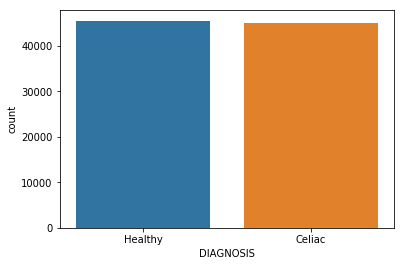

In [48]:
# cout raws per diagnosis class 
ax = sns.countplot(df_gene['DIAGNOSIS'],label="Count")       
C, H = df_gene['DIAGNOSIS'].value_counts()
print('Number of Celiac: ',C)
print('Number of Healthy : ',H)
print('Difference:',(C-H))
print('percentage: ', (C-H)/C)

In [ ]:
# cout raws per diagnosis class 
ax = sns.countplot(df_gene['DIAGNOSIS'],label="Count")       
C, H = df_gene['DIAGNOSIS'].value_counts()
print('Number of Celiac: ',C)
print('Number of Healthy : ',H)
print('Difference:',(C-H))
print('percentage: ', (C-H)/C)

# seaborn graph for IGHV5-51

In [72]:
data = df_gene
# y includes our labels and x includes our features
y = data.DIAGNOSIS
list = ['Unnamed: 0','SUBJECT','DIAGNOSIS']
x = data.drop(list,axis = 1 )

x_part =x.iloc[:,0:9]

# first ten features
diagnosis_vec = y
data_features = x_part
data_n_2 = (data_features - data_features.mean()) / (data_features.std())              # standardization Z score
data_n_2.head()

data_features = pd.concat([y,data_n_2],axis=1)




(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

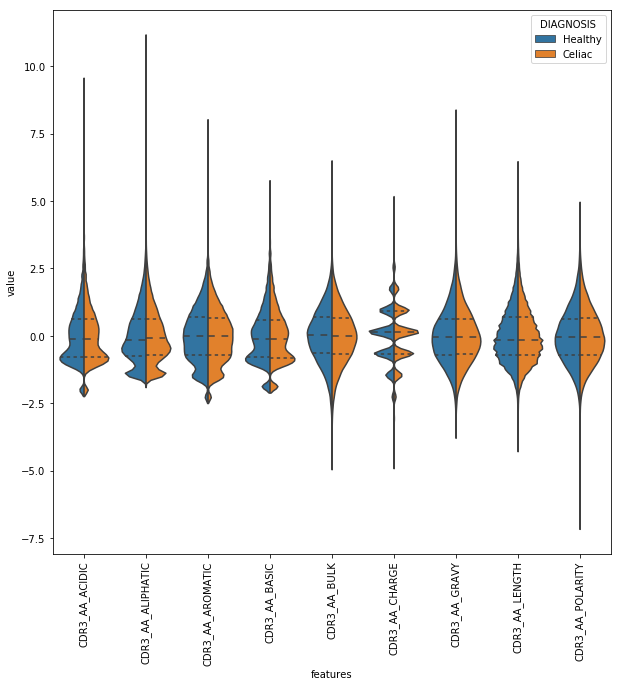

In [73]:
data_features = pd.melt(data_features,id_vars="DIAGNOSIS",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="DIAGNOSIS", data=data_features ,split=True, inner="quartile")
plt.xticks(rotation=90)


# Complete code : CDR3 distribution for specific gene

In [74]:
# V2-14 light cahin

In [ ]:
#